In [1]:
import torch
import pandas as pd
import numpy as np

import pickle
from PIL import Image

In [2]:
res1 = pd.read_csv("../miniresnet/results.csv")
res2 = pd.read_csv("../miniresnet/results_resize_test.csv")

In [3]:
with open("../data/testdata/cifar_test_nolabels.pkl", "rb") as f:
    data = pickle.load(f)

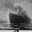

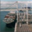

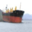

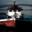

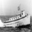

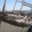

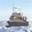

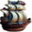

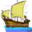

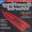

In [4]:
for image in data[b"data"][:10]:
    display(Image.fromarray(image.reshape(3, 32, 32).transpose(1, 2, 0)))

In [5]:
import sys
sys.path.append("..")
sys.path.append("../miniresnet")

In [6]:
from miniresnet.model import MiniResNet
from miniresnet.run import load_model

In [7]:
model = load_model("../miniresnet/checkpoint/ckpt.pth", "mps")

In [8]:
model

MiniResNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Sequential(
    (0): ResidualBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (shortcut): Sequential()
    )
  )
  (layer2): Sequential(
    (0): ResidualBlock(
      (conv1): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchN

In [9]:
model = model.eval()
model = model.cpu()